### Case Study

### Overall Data Summary: 

- There are 3500 Entries with 8 Columns. After removing the duplicate rows from the data the shape of data is now 3489, 8.  Subscriptions are evenly spread between different levels highlighting that the data is balanced.

- 3 NA values in Subscription Level and 2810 NA values in has_online_tour.

- There is no response for has_online_tour for Low vacancy_level.

- Data is available only till June 2019.

- Date of subscription is available from which year,month and day of the subscription have been extracted to check the effect of these variables on subscription level..

- More subscriptions happen on Friday and Sunday.Subscriptions happen at the start of the month or at the end of the month. Higher level of subscription on Last quarter of the year may be due to holiday season.

- City Id 152 has the most subscriptions.Generally on an average High lead volume results in high subscriptions but sometimes if photo quality is high it leads to high subscriptions even if the lead volume is low. 

- Due to High Photo Quality even Low Lead Volume is resulting in higher subscriptions for this city.

- There is dependency between vacancy_level and photo quality. Also there is a dependency between vacancy level and lead volume.

- Variable importance shows City_id,day,month as very important variable for subscription level

In [1]:
##Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Read the data
data = pd.read_excel('data_scientist_case_study.xlsx')
data.head(5)

,subscription_level,sign_up_date,building_type,vacancy_level,city_id,has_online_tour,photo_quality,lead_volume
0,Level4,2016-07-24,low-rise,LOW,175,NaN,low,medium
1,Level9,2018-12-23,low-rise,LOW,193,NaN,high,medium
2,Level1,2016-12-02,low-rise,LOW,155,NaN,high,medium
3,Level4,2017-09-03,low-rise,LOW,155,NaN,low,medium
4,Level2,2016-07-29,low-rise,LOW,165,NaN,high,high


### EDA

In [3]:
##Get the information abot the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   subscription_level  3497 non-null   object        
 1   sign_up_date        3500 non-null   datetime64[ns]
 2   building_type       3500 non-null   object        
 3   vacancy_level       3500 non-null   object        
 4   city_id             3500 non-null   int64         
 5   has_online_tour     690 non-null    object        
 6   photo_quality       3500 non-null   object        
 7   lead_volume         3500 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 218.9+ KB


In [4]:
data.shape

(3500, 8)

In [5]:
###Find out the missing values in the data
missingvalues=data.isna().sum()
print(missingvalues)
missingvalues = missingvalues.to_frame().reset_index()

subscription_level       3
sign_up_date             0
building_type            0
vacancy_level            0
city_id                  0
has_online_tour       2810
photo_quality            0
lead_volume              0
dtype: int64


It is evident that there are 3 missing values in subscription_level and 2810 missing values in has_online_tour

In [ ]:
# 'has_online_tour' has many missing values
#************************************************
#Assumption: has_online_tour is a newly introduced feature, and currently few users are comfortable using it,
# maybe they need some more hints to get them comfortable using this feature.
#***************************************************

#can fill missing values here by imputation. One way to fill would be mode of has_online_tour
#Other option is to convert those missing values to NA and now the column has three distinct values: yes, no and NA

In [6]:
##Find duplicate values in the dataset
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,subscription_level,sign_up_date,building_type,vacancy_level,city_id,has_online_tour,photo_quality,lead_volume
806,Level1,2016-11-05,mid-rise,LOW,165,NaN,low,high
1253,Level2,2016-09-03,low-rise,HIGH,152,no,high,high
1286,Level3,2017-04-25,mid-rise,LOW,152,NaN,high,medium
1887,Level4,2017-06-29,low-rise,LOW,152,NaN,high,medium
2214,Level7,2017-05-26,mid-rise,LOW,152,NaN,high,medium
2365,Level1,2017-01-05,low-rise,LOW,155,NaN,high,medium
2506,Level1,2017-07-28,low-rise,LOW,152,NaN,high,medium
2530,Level10,2017-08-25,low-rise,LOW,152,NaN,high,medium
2593,Level1,2017-10-27,low-rise,LOW,152,NaN,high,medium
2716,Level9,2018-06-24,low-rise,LOW,175,NaN,high,medium


In [7]:
##We can drop the duplicate values
data.drop_duplicates(inplace=True)
#Now check the shape of the data
data.shape

(3489, 8)

In [8]:
data['city_id'] = pd.Categorical(data.city_id)

###Filter out relevent information from the date column like: year, day of week, weekend, day, month etc. 
data['day'] = data['sign_up_date'].dt.day
data['dayofweek'] = data['sign_up_date'].dt.dayofweek
data['dayofweek_name'] = data['sign_up_date'].dt.day_name()
data['is_weekend'] = np.where(data['dayofweek_name'].isin(['Sunday','Saturday']),1,0)


data['day'] = pd.Categorical(data.day)


data['dayofweek_name'] = pd.Categorical(data.dayofweek_name)


data['is_weekend'] = pd.Categorical(data.is_weekend)

data = data.drop(['dayofweek'], axis = 1)

data['month_of_date'] = data['sign_up_date'].dt.month
data['month_of_date'] = pd.Categorical(data.month_of_date)

data['year_of_date'] = data['sign_up_date'].dt.year
data['year_of_date'] = pd.Categorical(data.year_of_date)

##In the building type column convert low rise to low-rise now there will be only two distinct categories in this column
data["building_type"].replace({"low rise": "low-rise"}, inplace=True)
##As 
data['has_online_tour'] = data['has_online_tour'].fillna('NA')
data['subscription_level'] = data['subscription_level'].fillna('NA')

In [10]:
data_ = data.select_dtypes('object')
for col in data_.columns:
    print(col) # to print categories name only
    print(data_[col].nunique()) # to print count of every category

subscription_level
11
building_type
2
vacancy_level
2
has_online_tour
3
photo_quality
2
lead_volume
2


In [11]:
#Check the data again 
data.head(5)

,subscription_level,sign_up_date,building_type,vacancy_level,city_id,has_online_tour,photo_quality,lead_volume,day,dayofweek_name,is_weekend,month_of_date,year_of_date
0,Level4,2016-07-24,low-rise,LOW,175,NA,low,medium,24,Sunday,1,7,2016
1,Level9,2018-12-23,low-rise,LOW,193,NA,high,medium,23,Sunday,1,12,2018
2,Level1,2016-12-02,low-rise,LOW,155,NA,high,medium,2,Friday,0,12,2016
3,Level4,2017-09-03,low-rise,LOW,155,NA,low,medium,3,Sunday,1,9,2017
4,Level2,2016-07-29,low-rise,LOW,165,NA,high,high,29,Friday,0,7,2016


In [12]:
data.dtypes

subscription_level            object
sign_up_date          datetime64[ns]
building_type                 object
vacancy_level                 object
city_id                     category
has_online_tour               object
photo_quality                 object
lead_volume                   object
day                         category
dayofweek_name              category
is_weekend                  category
month_of_date               category
year_of_date                category
dtype: object

### Visualization

<AxesSubplot:ylabel='subscription_level'>

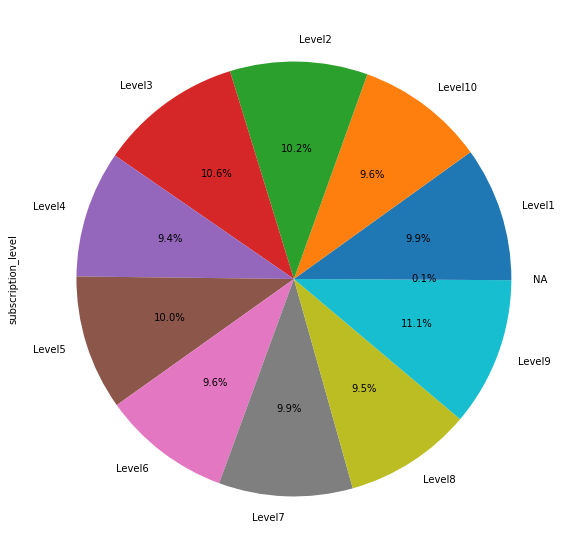

In [13]:
#Check the distribution of each subscription level
data.groupby("subscription_level")["subscription_level"].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

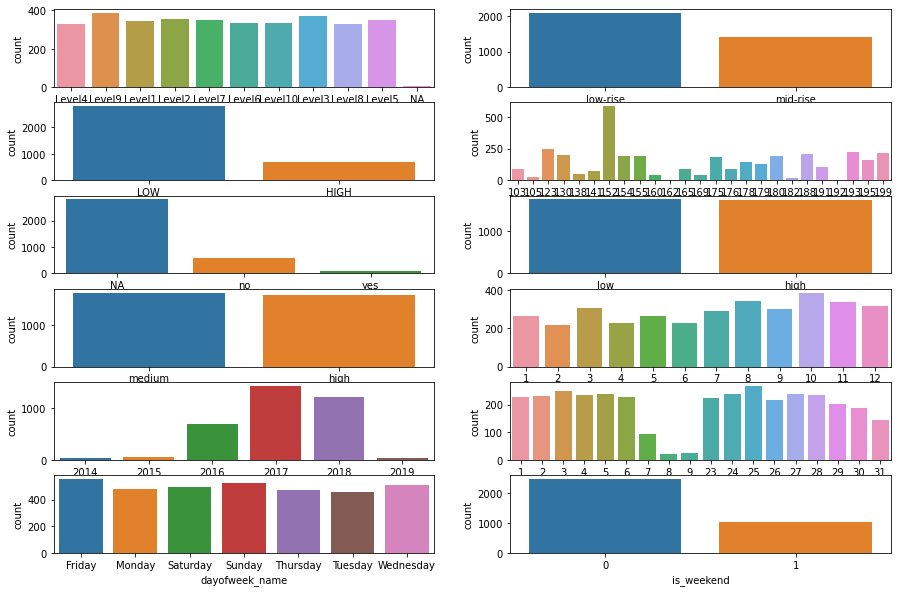

In [14]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(6,2,1)
sns.countplot(data = data, x = 'subscription_level', ax=ax1)

ax2 = fig.add_subplot(6,2,2)
sns.countplot(data = data, x = 'building_type', ax=ax2)

ax3 = fig.add_subplot(6,2,3)
sns.countplot(data = data, x = 'vacancy_level', ax=ax3)

ax4 = fig.add_subplot(6,2,4)
sns.countplot(data = data, x = 'city_id', ax=ax4)

ax5 = fig.add_subplot(6,2,5)
sns.countplot(data = data, x = 'has_online_tour', ax=ax5)

ax6 = fig.add_subplot(6,2,6)
sns.countplot(data = data, x = 'photo_quality', ax=ax6)

ax7 = fig.add_subplot(6,2,7)
sns.countplot(data = data, x = 'lead_volume', ax=ax7)

ax8 = fig.add_subplot(6,2,8)
sns.countplot(data = data, x = 'month_of_date', ax=ax8)

ax9 = fig.add_subplot(6,2,9)
sns.countplot(data = data, x = 'year_of_date', ax=ax9)

ax10 = fig.add_subplot(6,2,10)
sns.countplot(data = data, x = 'day', ax=ax10)

ax11 = fig.add_subplot(6,2,11)
sns.countplot(data = data, x = 'dayofweek_name', ax=ax11)

ax12 = fig.add_subplot(6,2,12)
sns.countplot(data = data, x = 'is_weekend', ax=ax12)


###### More EDA on all variables to see the trends

In [15]:
data[data['year_of_date'] == 2014].groupby('month_of_date')['year_of_date'].count()

month_of_date
1     1
2     5
3     6
4     4
5     4
6     5
7     2
8     3
9     2
10    4
11    5
12    1
Name: year_of_date, dtype: int64

In [16]:
data[data['year_of_date'] == 2017].groupby('month_of_date')['year_of_date'].count()

month_of_date
1     145
2     106
3     152
4     106
5     153
6     112
7     116
8     119
9      85
10    126
11    106
12    117
Name: year_of_date, dtype: int64

In [17]:
data[data['year_of_date'] == 2019].groupby('month_of_date')['year_of_date'].count()

month_of_date
1     13
2      1
3      6
4      3
5      5
6      1
7      0
8      0
9      0
10     0
11     0
12     0
Name: year_of_date, dtype: int64

Data is available only till June 2019

In [18]:
## Relationship between vacany_level and has_online_tour
crosstab=pd.crosstab(data.vacancy_level,data.has_online_tour)
crosstab

has_online_tour,NA,no,yes
vacancy_level,,,
HIGH,0,598,91
LOW,2800,0,0


#### There is no response for has_online_tour for Low vacancy_level

In [19]:
crosstab=pd.crosstab(data.month_of_date,data.subscription_level)
crosstab

subscription_level,Level1,Level10,Level2,Level3,Level4,Level5,Level6,Level7,Level8,Level9,NA
month_of_date,,,,,,,,,,,
1,28,23,26,25,29,34,25,23,29,24,1
2,22,12,27,25,24,20,19,20,21,28,0
3,29,34,27,35,23,31,36,34,37,22,1
4,24,29,20,22,25,17,24,29,22,16,0
5,23,24,31,24,24,31,22,23,32,30,0
6,21,26,19,21,28,19,22,23,17,30,0
7,28,25,34,30,31,29,34,25,20,33,0
8,29,31,35,43,23,38,43,26,32,45,0
9,37,23,38,41,26,23,25,37,23,29,0


##### Higher level of subscription on Last quarter of the year

In [20]:
crosstab=pd.crosstab(data.dayofweek_name,data.subscription_level)
crosstab

subscription_level,Level1,Level10,Level2,Level3,Level4,Level5,Level6,Level7,Level8,Level9,NA
dayofweek_name,,,,,,,,,,,
Friday,52,55,64,54,55,60,62,43,51,59,0
Monday,45,51,47,49,44,43,47,46,51,53,0
Saturday,51,44,54,48,41,43,51,46,46,67,0
Sunday,61,54,53,59,55,42,40,65,46,52,1
Thursday,44,50,44,57,41,47,40,52,51,47,0
Tuesday,44,42,48,55,34,48,49,44,29,62,0
Wednesday,49,39,47,49,59,67,45,51,57,46,2


#### Friday and Sunday have more subscriptions than rest of days

In [21]:
crosstab=pd.crosstab(data.month_of_date,data.vacancy_level,normalize='index')
crosstab

vacancy_level,HIGH,LOW
month_of_date,,
1,0.224719,0.775281
2,0.188073,0.811927
3,0.200647,0.799353
4,0.192982,0.807018
5,0.170455,0.829545
6,0.207965,0.792035
7,0.190311,0.809689
8,0.205797,0.794203
9,0.201987,0.798013


In [22]:
crosstab=pd.crosstab(data.dayofweek_name,data.vacancy_level,normalize='index')
crosstab

vacancy_level,HIGH,LOW
dayofweek_name,,
Friday,0.192793,0.807207
Monday,0.210084,0.789916
Saturday,0.173116,0.826884
Sunday,0.193182,0.806818
Thursday,0.202960,0.797040
Tuesday,0.184615,0.815385
Wednesday,0.225049,0.774951


In [23]:
crosstab=pd.crosstab(data.dayofweek_name,data.lead_volume,normalize='index')
crosstab

lead_volume,high,medium
dayofweek_name,,
Friday,0.461261,0.538739
Monday,0.521008,0.478992
Saturday,0.482688,0.517312
Sunday,0.488636,0.511364
Thursday,0.511628,0.488372
Tuesday,0.490110,0.509890
Wednesday,0.487280,0.512720


In [24]:
crosstab=pd.crosstab(data.month_of_date,data.lead_volume,normalize='index')
crosstab

lead_volume,high,medium
month_of_date,,
1,0.471910,0.528090
2,0.504587,0.495413
3,0.488673,0.511327
4,0.517544,0.482456
5,0.488636,0.511364
6,0.504425,0.495575
7,0.439446,0.560554
8,0.521739,0.478261
9,0.513245,0.486755


#### Effect of photo Quality

In [25]:
data[data['city_id'] == 152].groupby('photo_quality')['subscription_level'].count()

photo_quality
high    416
low     169
Name: subscription_level, dtype: int64

In [26]:
CrosstabResult=pd.crosstab(index=data['lead_volume'],columns=data['city_id'])
CrosstabResult

city_id,103,105,123,130,138,141,152,154,155,160,162,165,169,175,176,178,179,180,182,188,191,192,193,195,199
lead_volume,,,,,,,,,,,,,,,,,,,,,,,,,
high,40,11,107,103,22,39,244,124,100,21,2,49,24,86,45,66,61,91,7,113,43,1,119,83,112
medium,46,15,139,96,23,35,341,70,89,21,1,41,20,99,41,79,69,101,7,96,60,0,106,78,103


In [27]:
CrosstabResult=pd.crosstab(index=data['building_type'],columns=data['city_id'])
CrosstabResult

city_id,103,105,123,130,138,141,152,154,155,160,162,165,169,175,176,178,179,180,182,188,191,192,193,195,199
building_type,,,,,,,,,,,,,,,,,,,,,,,,,
low-rise,66,10,113,118,32,42,352,118,129,27,1,57,25,125,61,104,67,102,5,101,68,1,140,96,127
mid-rise,20,16,133,81,13,32,233,76,60,15,2,33,19,60,25,41,63,90,9,108,35,0,85,65,88


In [28]:
CrosstabResult=pd.crosstab(index=data['vacancy_level'],columns=data['city_id'])
CrosstabResult

city_id,103,105,123,130,138,141,152,154,155,160,162,165,169,175,176,178,179,180,182,188,191,192,193,195,199
vacancy_level,,,,,,,,,,,,,,,,,,,,,,,,,
HIGH,16,3,24,36,9,13,181,66,38,7,1,15,6,24,11,27,18,35,1,40,14,0,34,34,36
LOW,70,23,222,163,36,61,404,128,151,35,2,75,38,161,75,118,112,157,13,169,89,1,191,127,179


In [29]:
CrosstabResult=pd.crosstab(index=data['has_online_tour'],columns=data['city_id'])
CrosstabResult

city_id,103,105,123,130,138,141,152,154,155,160,162,165,169,175,176,178,179,180,182,188,191,192,193,195,199
has_online_tour,,,,,,,,,,,,,,,,,,,,,,,,,
NA,70,23,222,163,36,61,404,128,151,35,2,75,38,161,75,118,112,157,13,169,89,1,191,127,179
no,13,3,18,30,9,12,157,57,32,5,0,12,5,23,10,24,14,31,1,35,12,0,33,32,30
yes,3,0,6,6,0,1,24,9,6,2,1,3,1,1,1,3,4,4,0,5,2,0,1,2,6


In [30]:
CrosstabResult=pd.crosstab(index=data['photo_quality'],columns=data['city_id'])
CrosstabResult

city_id,103,105,123,130,138,141,152,154,155,160,162,165,169,175,176,178,179,180,182,188,191,192,193,195,199
photo_quality,,,,,,,,,,,,,,,,,,,,,,,,,
high,43,18,127,98,23,36,416,75,87,15,1,45,16,85,31,70,58,91,6,94,60,0,96,67,82
low,43,8,119,101,22,38,169,119,102,27,2,45,28,100,55,75,72,101,8,115,43,1,129,94,133


##### Due to High Photo Quality even Low Lead Volume is resulting in higher subscriptions for this city

<AxesSubplot:xlabel='dayofweek_name'>

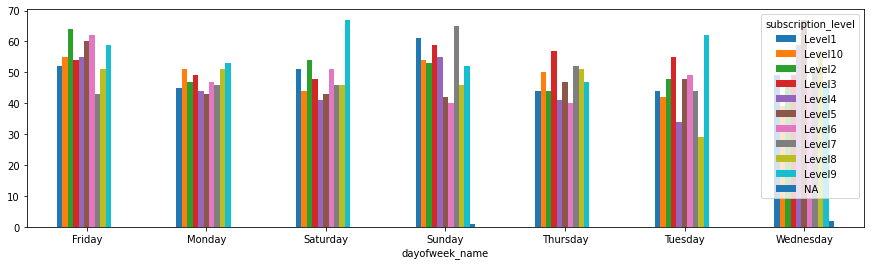

In [31]:
CrosstabResult=pd.crosstab(index=data['dayofweek_name'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4),rot=0)


##### Saturday and Tuesday reports high level of subscriptions of Level 9. Sunday reports high level of subscription Level 7

<AxesSubplot:xlabel='is_weekend'>

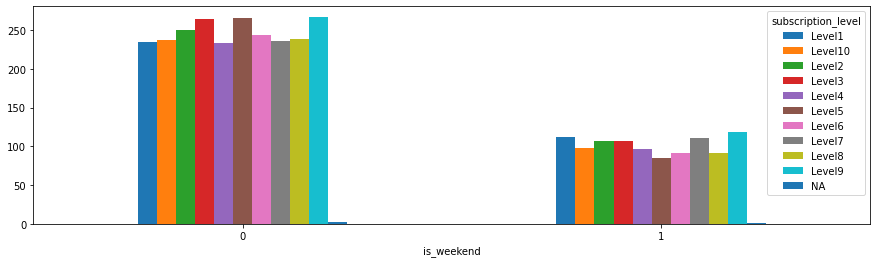

In [32]:
CrosstabResult=pd.crosstab(index=data['is_weekend'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)

<AxesSubplot:xlabel='month_of_date'>

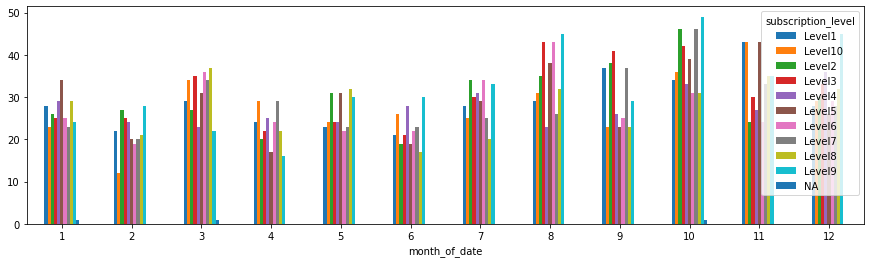

In [33]:
CrosstabResult=pd.crosstab(index=data['month_of_date'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)

#### Subscriptions are higher towards the end of year may be due to holiday season

<AxesSubplot:xlabel='year_of_date'>

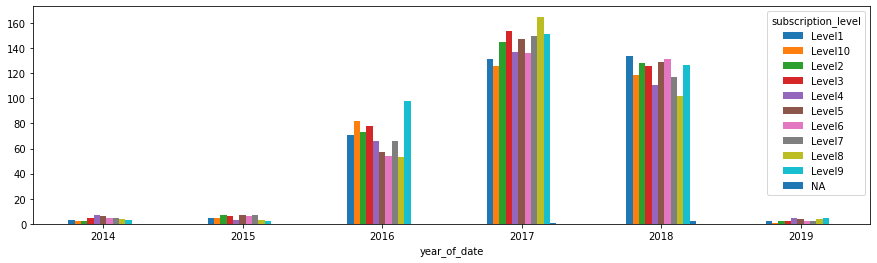

In [34]:
CrosstabResult=pd.crosstab(index=data['year_of_date'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)

<AxesSubplot:xlabel='lead_volume'>

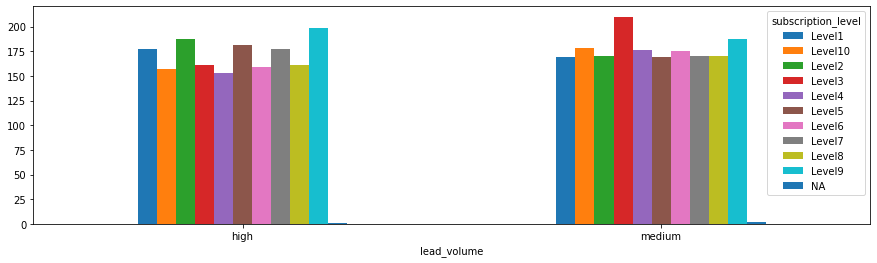

In [35]:
CrosstabResult=pd.crosstab(index=data['lead_volume'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)

<AxesSubplot:xlabel='building_type'>

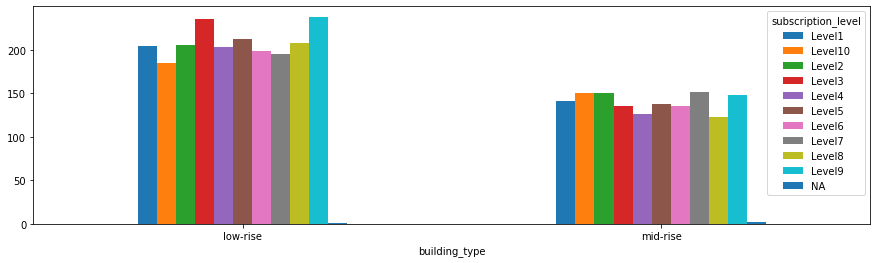

In [36]:
CrosstabResult=pd.crosstab(index=data['building_type'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)


<AxesSubplot:xlabel='vacancy_level'>

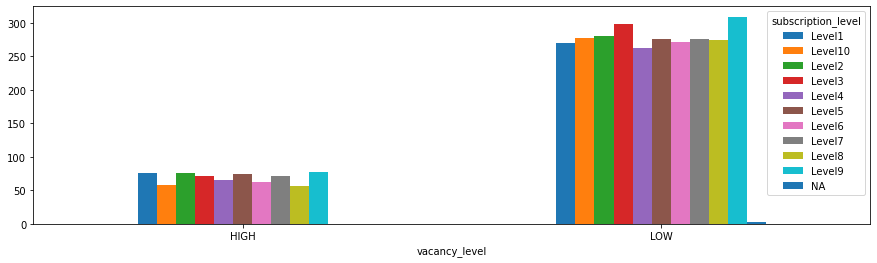

In [37]:
CrosstabResult=pd.crosstab(index=data['vacancy_level'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)


<AxesSubplot:xlabel='has_online_tour'>

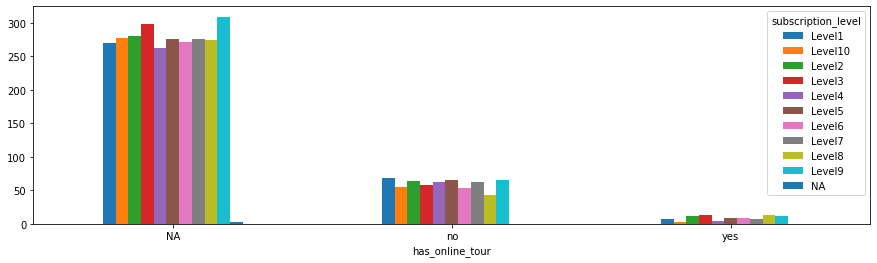

In [38]:
CrosstabResult=pd.crosstab(index=data['has_online_tour'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)


<AxesSubplot:xlabel='photo_quality'>

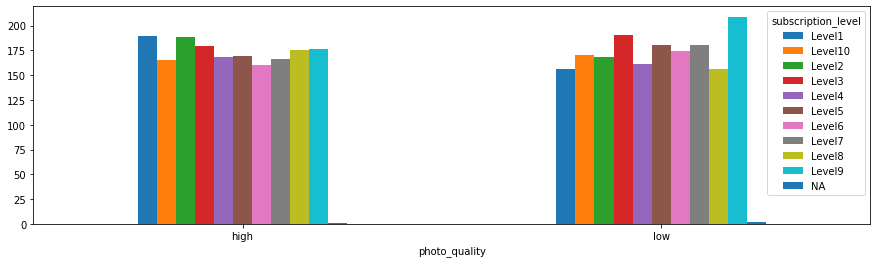

In [39]:
CrosstabResult=pd.crosstab(index=data['photo_quality'],columns=data['subscription_level'])

%matplotlib inline 

CrosstabResult.plot.bar(figsize=(15,4), rot=0)

In [40]:
#prepare cross tabulation
from scipy import stats
crosstab = pd.crosstab(data['building_type'], data['vacancy_level'])
print(crosstab)

vacancy_level  HIGH   LOW
building_type            
low-rise        399  1688
mid-rise        290  1112


#### Hypothesis Testing

In [41]:
# chi-squared test with similar proportions
#************************************************
#     Hypothesis Testing
#************************************************
#H0 (Null Hypothesis): The subscription level is independent of building_type
#################################################
#H1 (Alternate Hypothesis): The subscription level depends on building_type
#################################################

#perform chi square test for independency

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print(stats.chi2_contingency(crosstab))
print("**********************************************")
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
#**********************************************
# Conclusion
#**********************************************
#chi sq val is 1.120
#here p-val is 0.273<0.05 thus we fail to reject H0
#degrees of freedom= (no of rows-1)x(no of cols-1) here 1

(1.201390514975761, 0.2730439361903719, 1, array([[ 412.13614216, 1674.86385784],
       [ 276.86385784, 1125.13614216]]))
**********************************************
dof=1
[[ 412.13614216 1674.86385784]
 [ 276.86385784 1125.13614216]]
significance=0.050, p=0.273
Independent (fail to reject H0)


In [42]:
##Chi Sqaure test for other variables
from scipy import stats
crosstab = pd.crosstab(data['building_type'], data['photo_quality'])
print(crosstab)

photo_quality  high   low
building_type            
low-rise       1034  1053
mid-rise        706   696


In [43]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[1040.80825451 1046.19174549]
 [ 699.19174549  702.80825451]]
significance=0.050, p=0.663
Independent (fail to reject H0)


In [44]:
from scipy import stats
crosstab = pd.crosstab(data['building_type'], data['lead_volume'])
print(crosstab)

lead_volume    high  medium
building_type              
low-rise       1021    1066
mid-rise        692     710


In [45]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[1024.6577816 1062.3422184]
 [ 688.3422184  713.6577816]]
significance=0.050, p=0.827
Independent (fail to reject H0)


In [46]:
from scipy import stats
crosstab = pd.crosstab(data['building_type'], data['is_weekend'])
print(crosstab)

is_weekend        0    1
building_type           
low-rise       1472  615
mid-rise        998  404


In [47]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[1477.46918888  609.53081112]
 [ 992.53081112  409.46918888]]
significance=0.050, p=0.706
Independent (fail to reject H0)


In [48]:
from scipy import stats
crosstab = pd.crosstab(data['vacancy_level'], data['photo_quality'])
print(crosstab)

photo_quality  high   low
vacancy_level            
HIGH            304   385
LOW            1436  1364


In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[ 343.61134996  345.38865004]
 [1396.38865004 1403.61134996]]
significance=0.050, p=0.001
Dependent (reject H0)


In [50]:
from scipy import stats
crosstab = pd.crosstab(data['vacancy_level'], data['lead_volume'])
print(crosstab)

lead_volume    high  medium
vacancy_level              
HIGH            479     210
LOW            1234    1566


In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[ 338.2794497  350.7205503]
 [1374.7205503 1425.2794497]]
significance=0.050, p=0.000
Dependent (reject H0)


In [52]:
from scipy import stats
crosstab = pd.crosstab(data['vacancy_level'], data['is_weekend'])
print(crosstab)

is_weekend        0    1
vacancy_level           
HIGH            502  187
LOW            1968  832


In [53]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[ 487.77013471  201.22986529]
 [1982.22986529  817.77013471]]
significance=0.050, p=0.199
Independent (fail to reject H0)


In [54]:
from scipy import stats
crosstab = pd.crosstab(data['photo_quality'], data['lead_volume'])
print(crosstab)

lead_volume    high  medium
photo_quality              
high            399    1341
low            1314     435


In [55]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[854.29062769 885.70937231]
 [858.70937231 890.29062769]]
significance=0.050, p=0.000
Dependent (reject H0)


In [56]:
from scipy import stats
crosstab = pd.crosstab(data['photo_quality'], data['is_weekend'])
print(crosstab)

is_weekend        0    1
photo_quality           
high           1242  498
low            1228  521


In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[1231.81427343  508.18572657]
 [1238.18572657  510.81427343]]
significance=0.050, p=0.471
Independent (fail to reject H0)


In [58]:
from scipy import stats
crosstab = pd.crosstab(data['lead_volume'], data['is_weekend'])
print(crosstab)

is_weekend      0    1
lead_volume           
high         1218  495
medium       1252  524


In [59]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[1212.69991402  500.30008598]
 [1257.30008598  518.69991402]]
significance=0.050, p=0.721
Independent (fail to reject H0)


#### Building model to check the importance of various features on subscription level

In [60]:
train=data.copy()
train['subscription_level'] = pd.Categorical(train.subscription_level)
train['building_type'] = pd.Categorical(train.building_type)
train['vacancy_level'] = pd.Categorical(train.vacancy_level)
train['has_online_tour'] = pd.Categorical(train.has_online_tour)
train['photo_quality'] = pd.Categorical(train.photo_quality)
train['lead_volume'] = pd.Categorical(train.lead_volume)


from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
train['building_type']=le.fit_transform(train['building_type'])
train['vacancy_level']=le.fit_transform(train['vacancy_level'])
train['has_online_tour']=le.fit_transform(train['has_online_tour'])
train['photo_quality']=le.fit_transform(train['photo_quality'])
train['lead_volume']=le.fit_transform(train['lead_volume'])
train['dayofweek_name'] = le.fit_transform(train['dayofweek_name'])

train=train.drop('sign_up_date', axis=1)
X_initial = train.drop('subscription_level', axis=1)
X = X_initial.values
y = train['subscription_level'].values

In [61]:
##Check the distribution of data in various subscription level
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'Level9': 386, 'Level3': 371, 'Level2': 357, 'Level5': 350, 'Level7': 347, 'Level1': 346, 'Level10': 335, 'Level6': 334, 'Level8': 331, 'Level4': 329, 'NA': 3})


In [62]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the Random Forest model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_initial.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
city_id,0.244285
day,0.193664
month_of_date,0.169251
dayofweek_name,0.108876
year_of_date,0.082003
building_type,0.045439
photo_quality,0.044490
lead_volume,0.041432
has_online_tour,0.025937
is_weekend,0.024329


So the important features to consider while taking subscription level as a target variable are presented in the descending order